# Data Visualization

Once upon a time there were plots upon plots upon plots.

## Load data

In [6]:
import pandas as pd
import sys
sys.path.append('../')
from source.bokeh_plots import *
from source.data_visualization import *
output_notebook()

df = pd.read_excel('../data/al_atlas_main_results.xlsx', index_col=0).sort_index()

Loading BokehJS ...

## Patient Characteristics

### Foundation (unsupervised) model

In [8]:
from tableone import TableOne

columns = ['Hematopoietic Entity','Age (group years)','Sex',
            'Clinical Trial',]

df_train = df[df['Train-Test']=='Train Sample']
df_test = df[df['Train-Test'] == 'Test Sample']

mytable_cog = TableOne(df_train.reset_index(), columns,
                        overall=False, missing=True,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Age (group years)':['0-5','5-13','13-39','39-60'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']})

# mytable_cog.to_excel('data/tableone_Dx_pacmap.xlsx')
# mytable_cog.to_csv(output_path + 'pacmap_output/tableone_Dx_pacmap.csv')

mytable_cog.tabulate(tablefmt="html", 
                        # headers=[score_name,"",'Missing','Discovery','Validation','p-value','Statistical Test']
                        )

'<table>\n<thead>\n<tr><th>                           </th><th>                                          </th><th>Missing  </th><th>Overall    </th></tr>\n</thead>\n<tbody>\n<tr><td>n                          </td><td>                                          </td><td>         </td><td>3308       </td></tr>\n<tr><td>Hematopoietic Entity, n (%)</td><td>Acute lymphoblastic leukemia (ALL)        </td><td>844      </td><td>700 (28.4) </td></tr>\n<tr><td>                           </td><td>Acute myeloid leukemia (AML)              </td><td>         </td><td>1207 (49.0)</td></tr>\n<tr><td>                           </td><td>Acute promyelocytic leukemia (APL)        </td><td>         </td><td>31 (1.3)   </td></tr>\n<tr><td>                           </td><td>Mixed phenotype acute leukemia (MPAL)     </td><td>         </td><td>50 (2.0)   </td></tr>\n<tr><td>                           </td><td>Myelodysplastic syndrome (MDS or MDS-like)</td><td>         </td><td>225 (9.1)  </td></tr>\n<tr><td>                           </td><td>Otherwise-Normal (Control)                </td><td>         </td><td>251 (10.2) </td></tr>\n<tr><td>Age (group years), n (%)   </td><td>0-5                                       </td><td>1320     </td><td>480 (24.1) </td></tr>\n<tr><td>                           </td><td>5-13                                      </td><td>         </td><td>482 (24.2) </td></tr>\n<tr><td>                           </td><td>13-39                                     </td><td>         </td><td>658 (33.1) </td></tr>\n<tr><td>                           </td><td>39-60                                     </td><td>         </td><td>165 (8.3)  </td></tr>\n<tr><td>                           </td><td>60+                                       </td><td>         </td><td>203 (10.2) </td></tr>\n<tr><td>Sex, n (%)                 </td><td>Female                                    </td><td>1511     </td><td>883 (49.1) </td></tr>\n<tr><td>                           </td><td>Male                                      </td><td>         </td><td>914 (50.9) </td></tr>\n<tr><td>Clinical Trial, n (%)      </td><td>AAML03P1                                  </td><td>41       </td><td>72 (2.2)   </td></tr>\n<tr><td>                           </td><td>AAML0531                                  </td><td>         </td><td>628 (19.2) </td></tr>\n<tr><td>                           </td><td>AAML1031                                  </td><td>         </td><td>581 (17.8) </td></tr>\n<tr><td>                           </td><td>Beat AML Consortium                       </td><td>         </td><td>316 (9.7)  </td></tr>\n<tr><td>                           </td><td>CCG2961                                   </td><td>         </td><td>41 (1.3)   </td></tr>\n<tr><td>                           </td><td>CETLAM SMD-09 (MDS-tAML)                  </td><td>         </td><td>166 (5.1)  </td></tr>\n<tr><td>                           </td><td>French GRAALL 2003–2005                   </td><td>         </td><td>141 (4.3)  </td></tr>\n<tr><td>                           </td><td>Japanese AML05                            </td><td>         </td><td>64 (2.0)   </td></tr>\n<tr><td>                           </td><td>NOPHO ALL92-2000                          </td><td>         </td><td>933 (28.6) </td></tr>\n<tr><td>                           </td><td>TARGET ALL                                </td><td>         </td><td>131 (4.0)  </td></tr>\n<tr><td>                           </td><td>TCGA AML                                  </td><td>         </td><td>194 (5.9)  </td></tr>\n</tbody>\n</table>'

### Fine-tuned (supervised) models

In [4]:
# Drop the samples with missing labels for the selected column
df_px = df_train[~df_train['Vital Status'].isna()]

# drop the samples with missing labels for the ELN AML 2022 Diagnosis
df_dx = df_train[~df_train['WHO 2022 Diagnosis'].isna()]

# exclude the classes with fewer than 10 samples
df_dx = df_dx[~df_dx['WHO 2022 Diagnosis'].isin([
                                       'MPAL with t(v;11q23.3)/KMT2A-r',
                                       'B-ALL with hypodiploidy',
                                       'AML with t(16;21); FUS::ERG',
                                       'AML with t(9;22); BCR::ABL1'
                                       ])]

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD','Treatment Arm']

df_test['Age (years)'] = df_test['Age (years)'].astype(float)

# join discovery clinical data with validation clinical data
all_cohorts = pd.concat([df_dx, df_px, df_test],
                         axis=0, keys=['AL Epigenomic Phenotype','AML Epigenomic Risk' ,'Validation'],
                         names=['cohort']).reset_index()

# columns = ['Age group (years)','Sex', 'MRD 1 Status',
#             'Leucocyte counts (10⁹/L)',
#             'Risk Group','FLT3 ITD', 'Treatment Arm','Clinical Trial']

mytable_cog = TableOne(all_cohorts, columns,
                        overall=False, missing=False,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                                groupby='cohort')

# mytable_cog.to_excel('../data/tableone_both_cohorts.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        # headers=[score_name,"",score_name,'Validation','p-value','Statistical Test']
)

'<table>\n<thead>\n<tr><th>                                      </th><th>                                         </th><th>AL Epigenomic Phenotype  </th><th>AML Epigenomic Risk  </th><th>Validation  </th></tr>\n</thead>\n<tbody>\n<tr><td>n                                     </td><td>                                         </td><td>2445                     </td><td>1844                 </td><td>201         </td></tr>\n<tr><td>Age (years), mean (SD)                </td><td>                                         </td><td>19.3 (19.8)              </td><td>19.5 (21.4)          </td><td>8.8 (6.0)   </td></tr>\n<tr><td>Age group (years), n (%)              </td><td>≥10                                      </td><td>520 (47.2)               </td><td>644 (48.2)           </td><td>95 (47.7)   </td></tr>\n<tr><td>                                      </td><td>&lt;10                                      </td><td>581 (52.8)               </td><td>693 (51.8)           </td><td>104 (52.3)  </td></tr>\n<tr><td>Sex, n (%)                            </td><td>Female                                   </td><td>702 (50.4)               </td><td>853 (49.2)           </td><td>87 (43.3)   </td></tr>\n<tr><td>                                      </td><td>Male                                     </td><td>691 (49.6)               </td><td>879 (50.8)           </td><td>114 (56.7)  </td></tr>\n<tr><td>Race or ethnic group, n (%)           </td><td>White                                    </td><td>1052 (80.4)              </td><td>1302 (80.4)          </td><td>143 (71.9)  </td></tr>\n<tr><td>                                      </td><td>Black or African American                </td><td>131 (10.0)               </td><td>155 (9.6)            </td><td>32 (16.1)   </td></tr>\n<tr><td>                                      </td><td>Asian                                    </td><td>65 (5.0)                 </td><td>87 (5.4)             </td><td>1 (0.5)     </td></tr>\n<tr><td>                                      </td><td>American Indian or Alaska Native         </td><td>7 (0.5)                  </td><td>8 (0.5)              </td><td>            </td></tr>\n<tr><td>                                      </td><td>Native Hawaiian or other Pacific Islander</td><td>7 (0.5)                  </td><td>10 (0.6)             </td><td>2 (1.0)     </td></tr>\n<tr><td>                                      </td><td>Other                                    </td><td>46 (3.5)                 </td><td>57 (3.5)             </td><td>21 (10.6)   </td></tr>\n<tr><td>Hispanic or Latino ethnic group, n (%)</td><td>Hispanic or Latino                       </td><td>204 (19.3)               </td><td>245 (19.0)           </td><td>25 (12.6)   </td></tr>\n<tr><td>                                      </td><td>Not Hispanic or Latino                   </td><td>851 (80.7)               </td><td>1044 (81.0)          </td><td>174 (87.4)  </td></tr>\n<tr><td>MRD 1 Status, n (%)                   </td><td>Positive                                 </td><td>282 (29.7)               </td><td>361 (31.4)           </td><td>76 (40.2)   </td></tr>\n<tr><td>                                      </td><td>Negative                                 </td><td>667 (70.3)               </td><td>787 (68.6)           </td><td>113 (59.8)  </td></tr>\n<tr><td>Leucocyte counts (10⁹/L), n (%)       </td><td>≥30                                      </td><td>572 (52.4)               </td><td>646 (48.9)           </td><td>88 (44.0)   </td></tr>\n<tr><td>                                      </td><td>&lt;30                                      </td><td>520 (47.6)               </td><td>676 (51.1)           </td><td>112 (56.0)  </td></tr>\n<tr><td>BM leukemic blasts (%), mean (SD)     </td><td>                                         </td><td>65.8 (24.1)              </td><td>65.1 (24.2)          </td><td>60.0 (25.6) </td></tr>\n<tr><td>Risk Group, n (%)                     </td><td>High Risk                                

## Main Figures

In [7]:
plot_linked_scatters(df)

## Devise subsets to plot

In [9]:
### Select samples from AAML1031, 0531, and 03P1 clinical trials
df1 = df[df['Clinical Trial'].isin(['AAML0531', 'AAML1031', 'AAML03P1'])]

print(
    f'{df.shape[0]-df1.shape[0]} samples were removed. {df1.shape[0]} samples remaining.')

### Select diagnostic samples only
df2 = df1[df1['Sample Type'].isin(
    ['Diagnosis', 'Primary Blood Derived Cancer - Bone Marrow', 'Primary Blood Derived Cancer - Peripheral Blood'])]

print(
    f'{df1.shape[0]-df2.shape[0]} samples were removed. {df2.shape[0]} samples remaining.')

### Remove duplicate samples
df_cog = df2[~df2['Patient_ID'].duplicated(keep='last')]

print(
    f'{df2.shape[0]-df_cog.shape[0]} samples were removed. {df_cog.shape[0]} samples remaining.')


2228 samples were removed. 1281 samples remaining.
332 samples were removed. 949 samples remaining.
9 samples were removed. 940 samples remaining.


In [10]:
# Import Plotting Functions
from source.data_visualization import *

model_name = 'AML Epigenomic Risk'

### Kaplan-Meier Plots

#### Overall study population

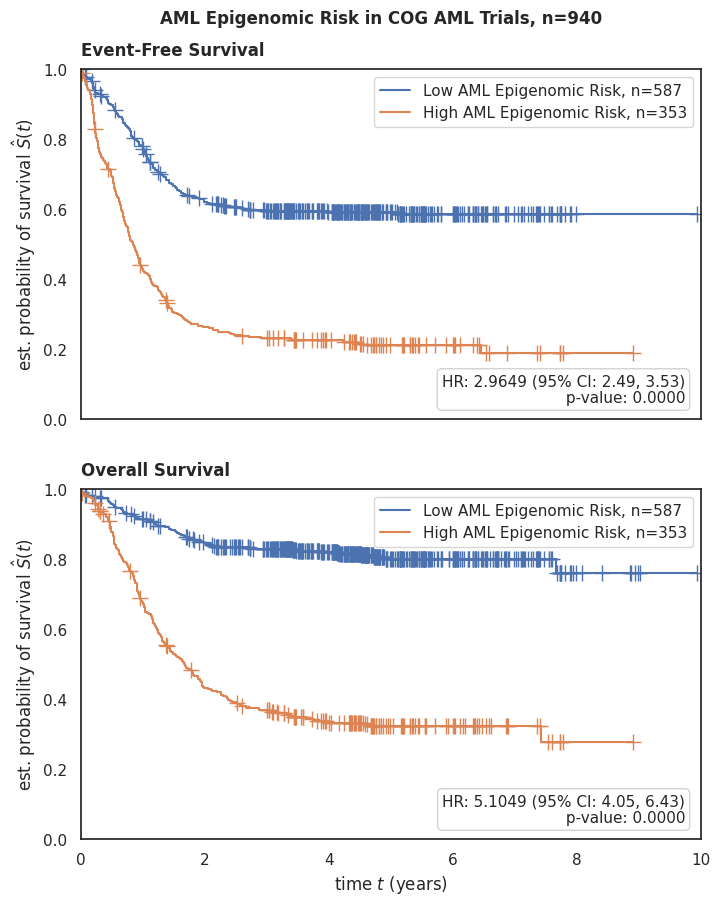

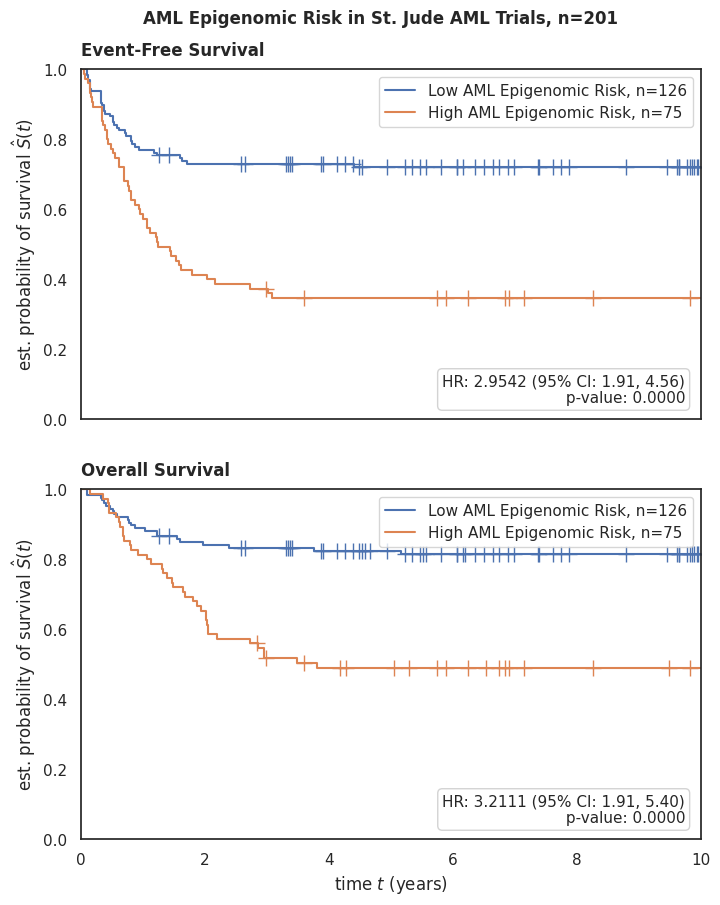

In [11]:

for dataset, trial in zip([df_cog, df_test], 
                          ['COG AML Trials', 'St. Jude AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                        df=dataset,
                        save_survival_table=False,
                        save_plot=False,
                        show_ci=False,
                        add_risk_counts=False,
                        trialname=trial)

#### Per risk group

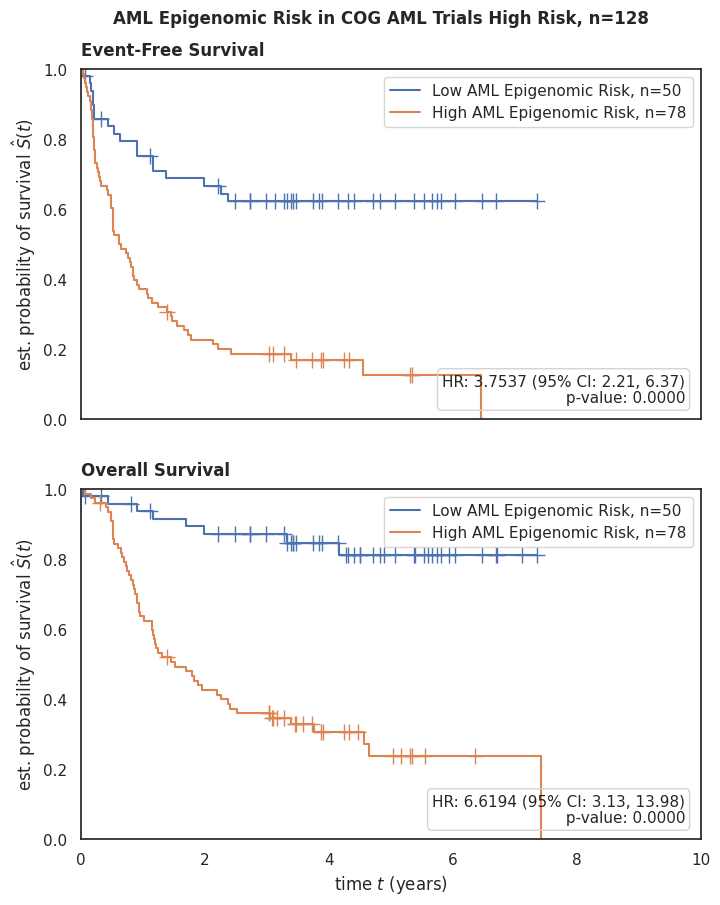

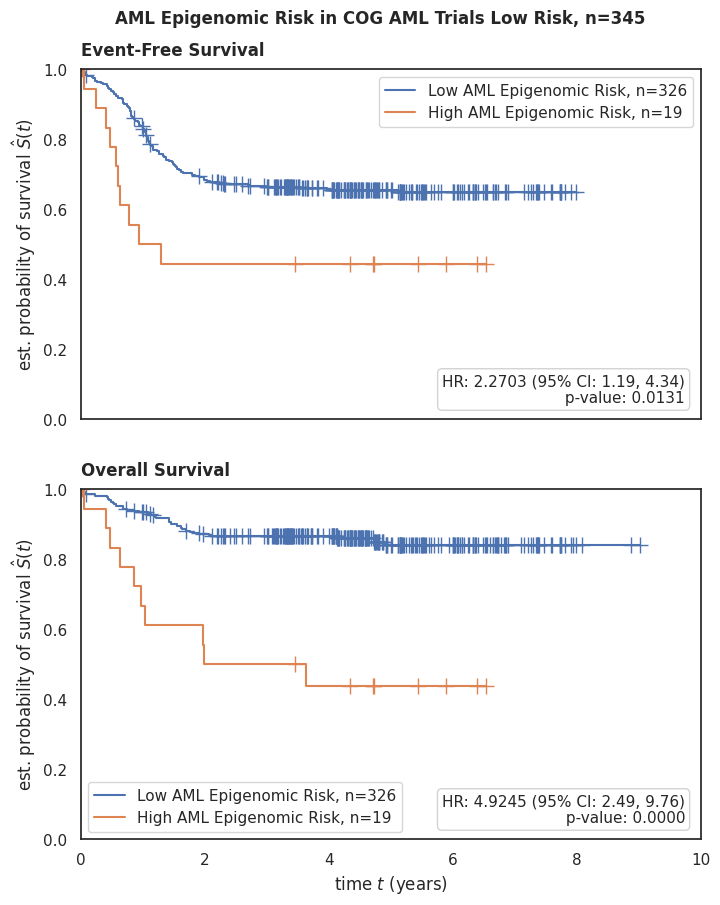

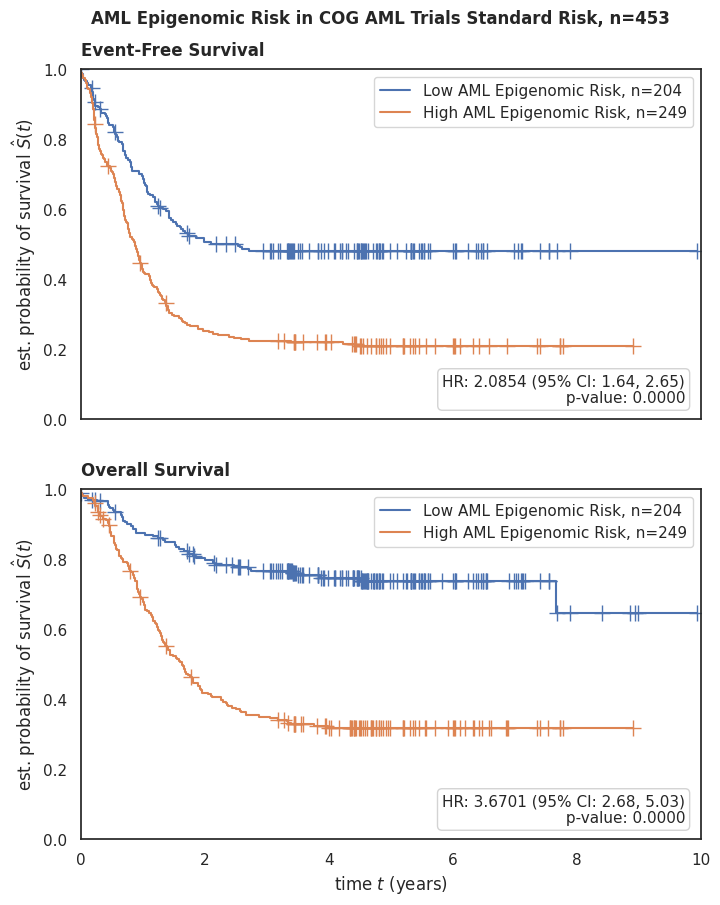

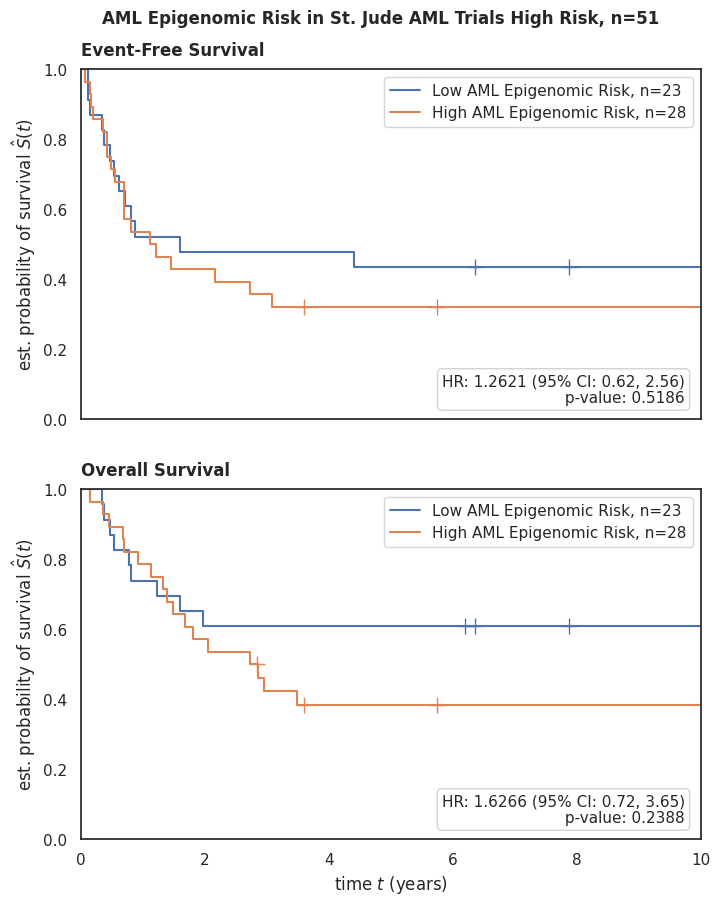

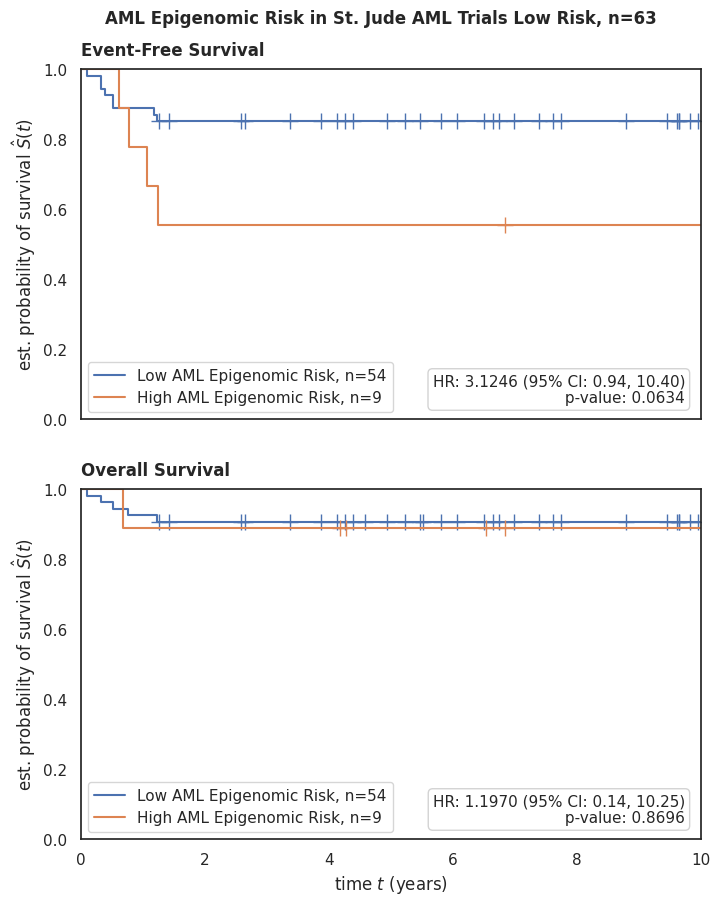

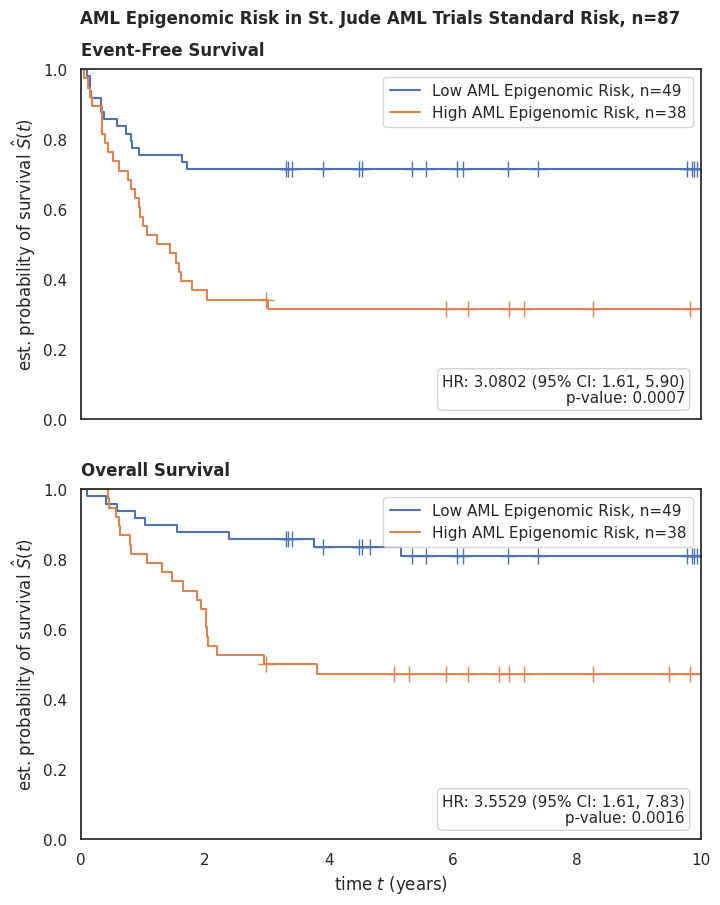

In [12]:
for dataset, trial in zip([df_cog, df_test], 
                          ['COG AML Trials', 'St. Jude AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'High Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' High Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'Low Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Low Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group'] == 'Standard Risk'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Standard Risk')

#### Per risk group (AAML1831 COG)

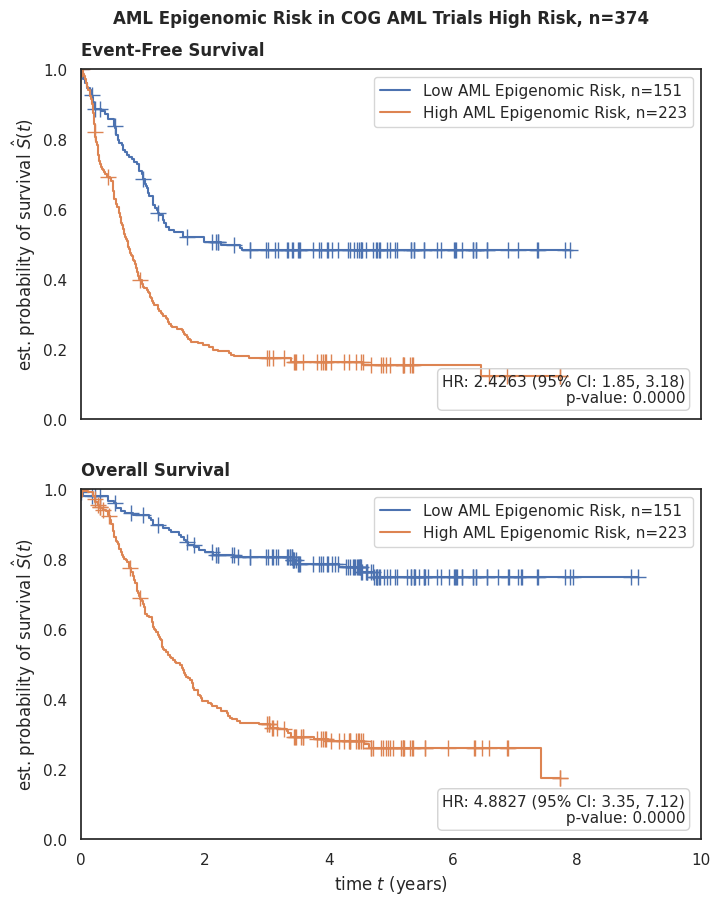

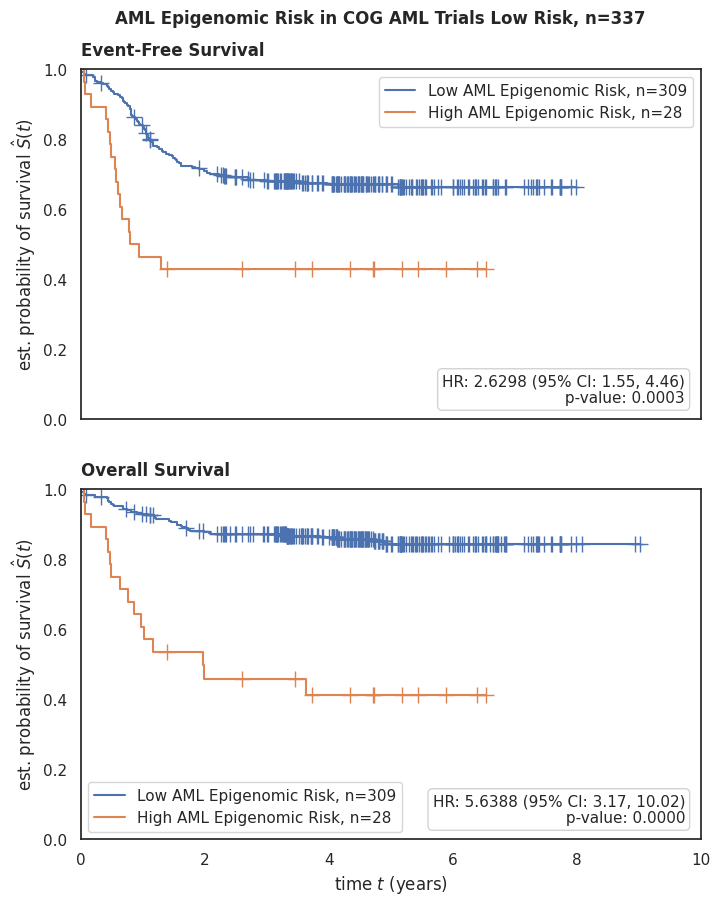

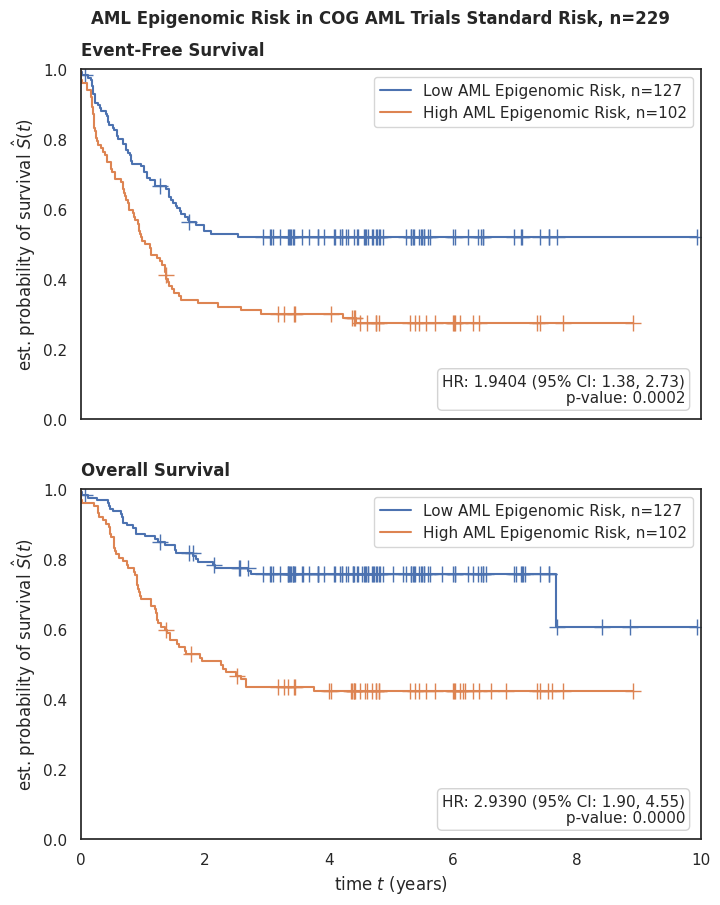

In [13]:
for dataset, trial in zip([df_cog], 
                          ['COG AML Trials']):
    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'High'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' High Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'Low'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Low Risk')

    draw_kaplan_meier(model_name=model_name,
                            df=dataset[dataset['Risk Group AAML1831'] == 'Standard'],
                            save_plot=False,
                            save_survival_table=False,
                            add_risk_counts=False,
                            trialname=trial + ' Standard Risk')

### Forest Plots

#### With MRD 1 and BM blast (%)

In [16]:
df_test['BM leukemic blasts (%)'] = pd.cut(df['BM leukemic blasts (%)'], bins=[0,50,100], labels=['≤50', '>50'])

df_test['AML_Epigenomic_Risk'] = df_test['AML Epigenomic Risk'] 

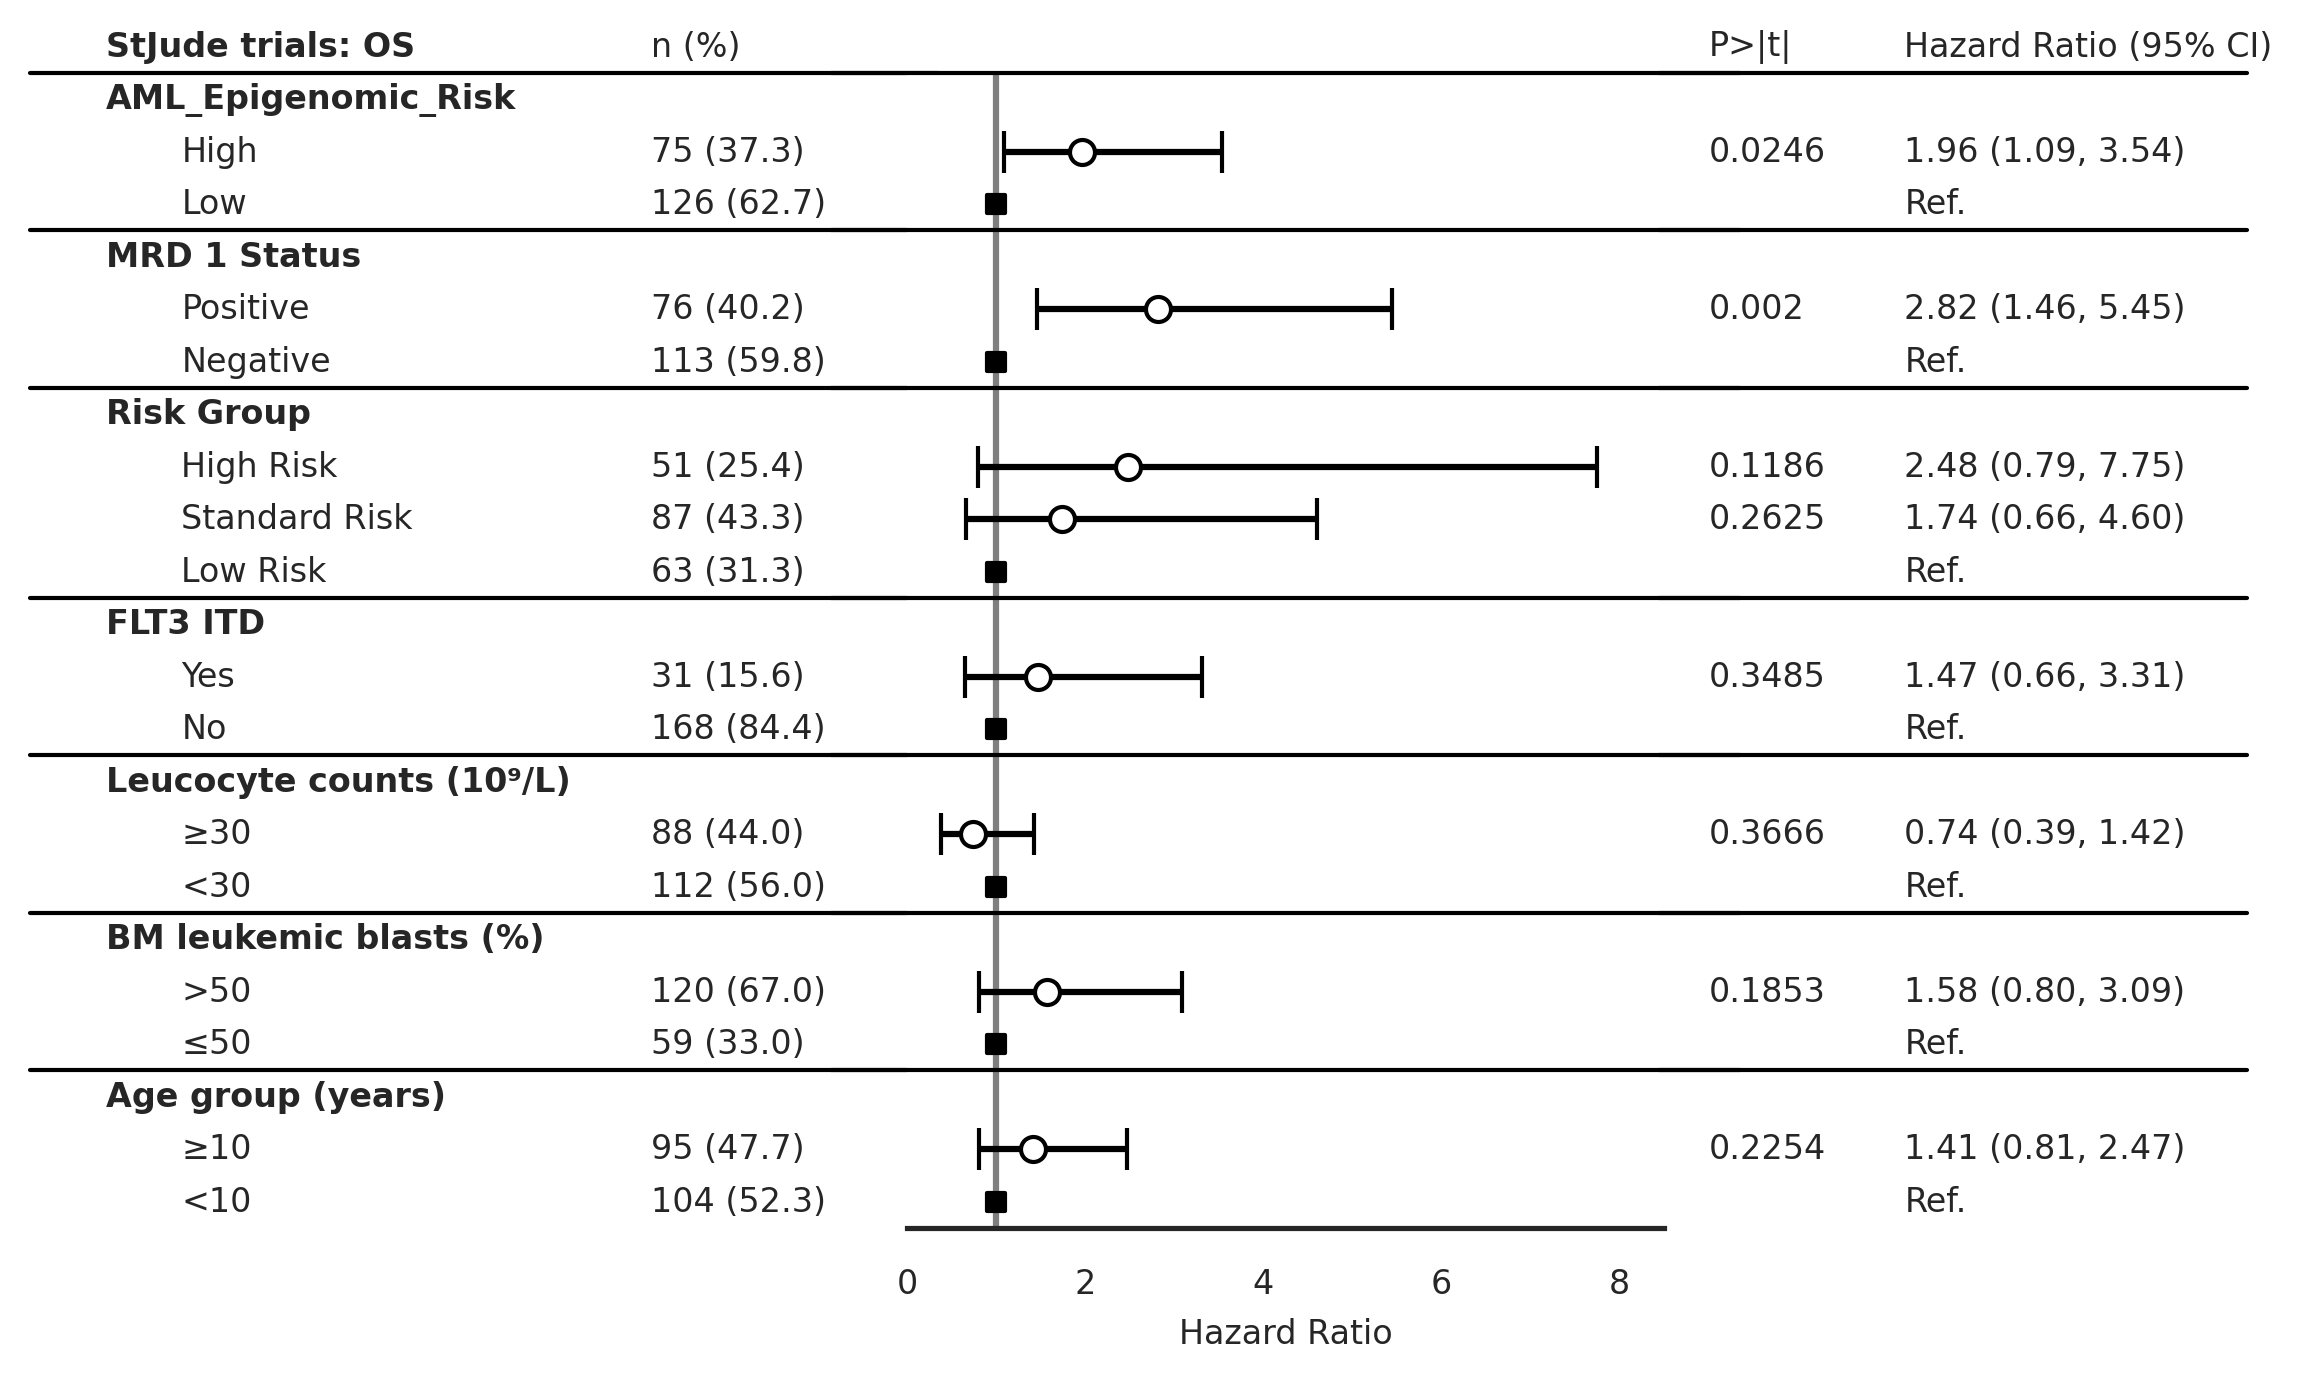

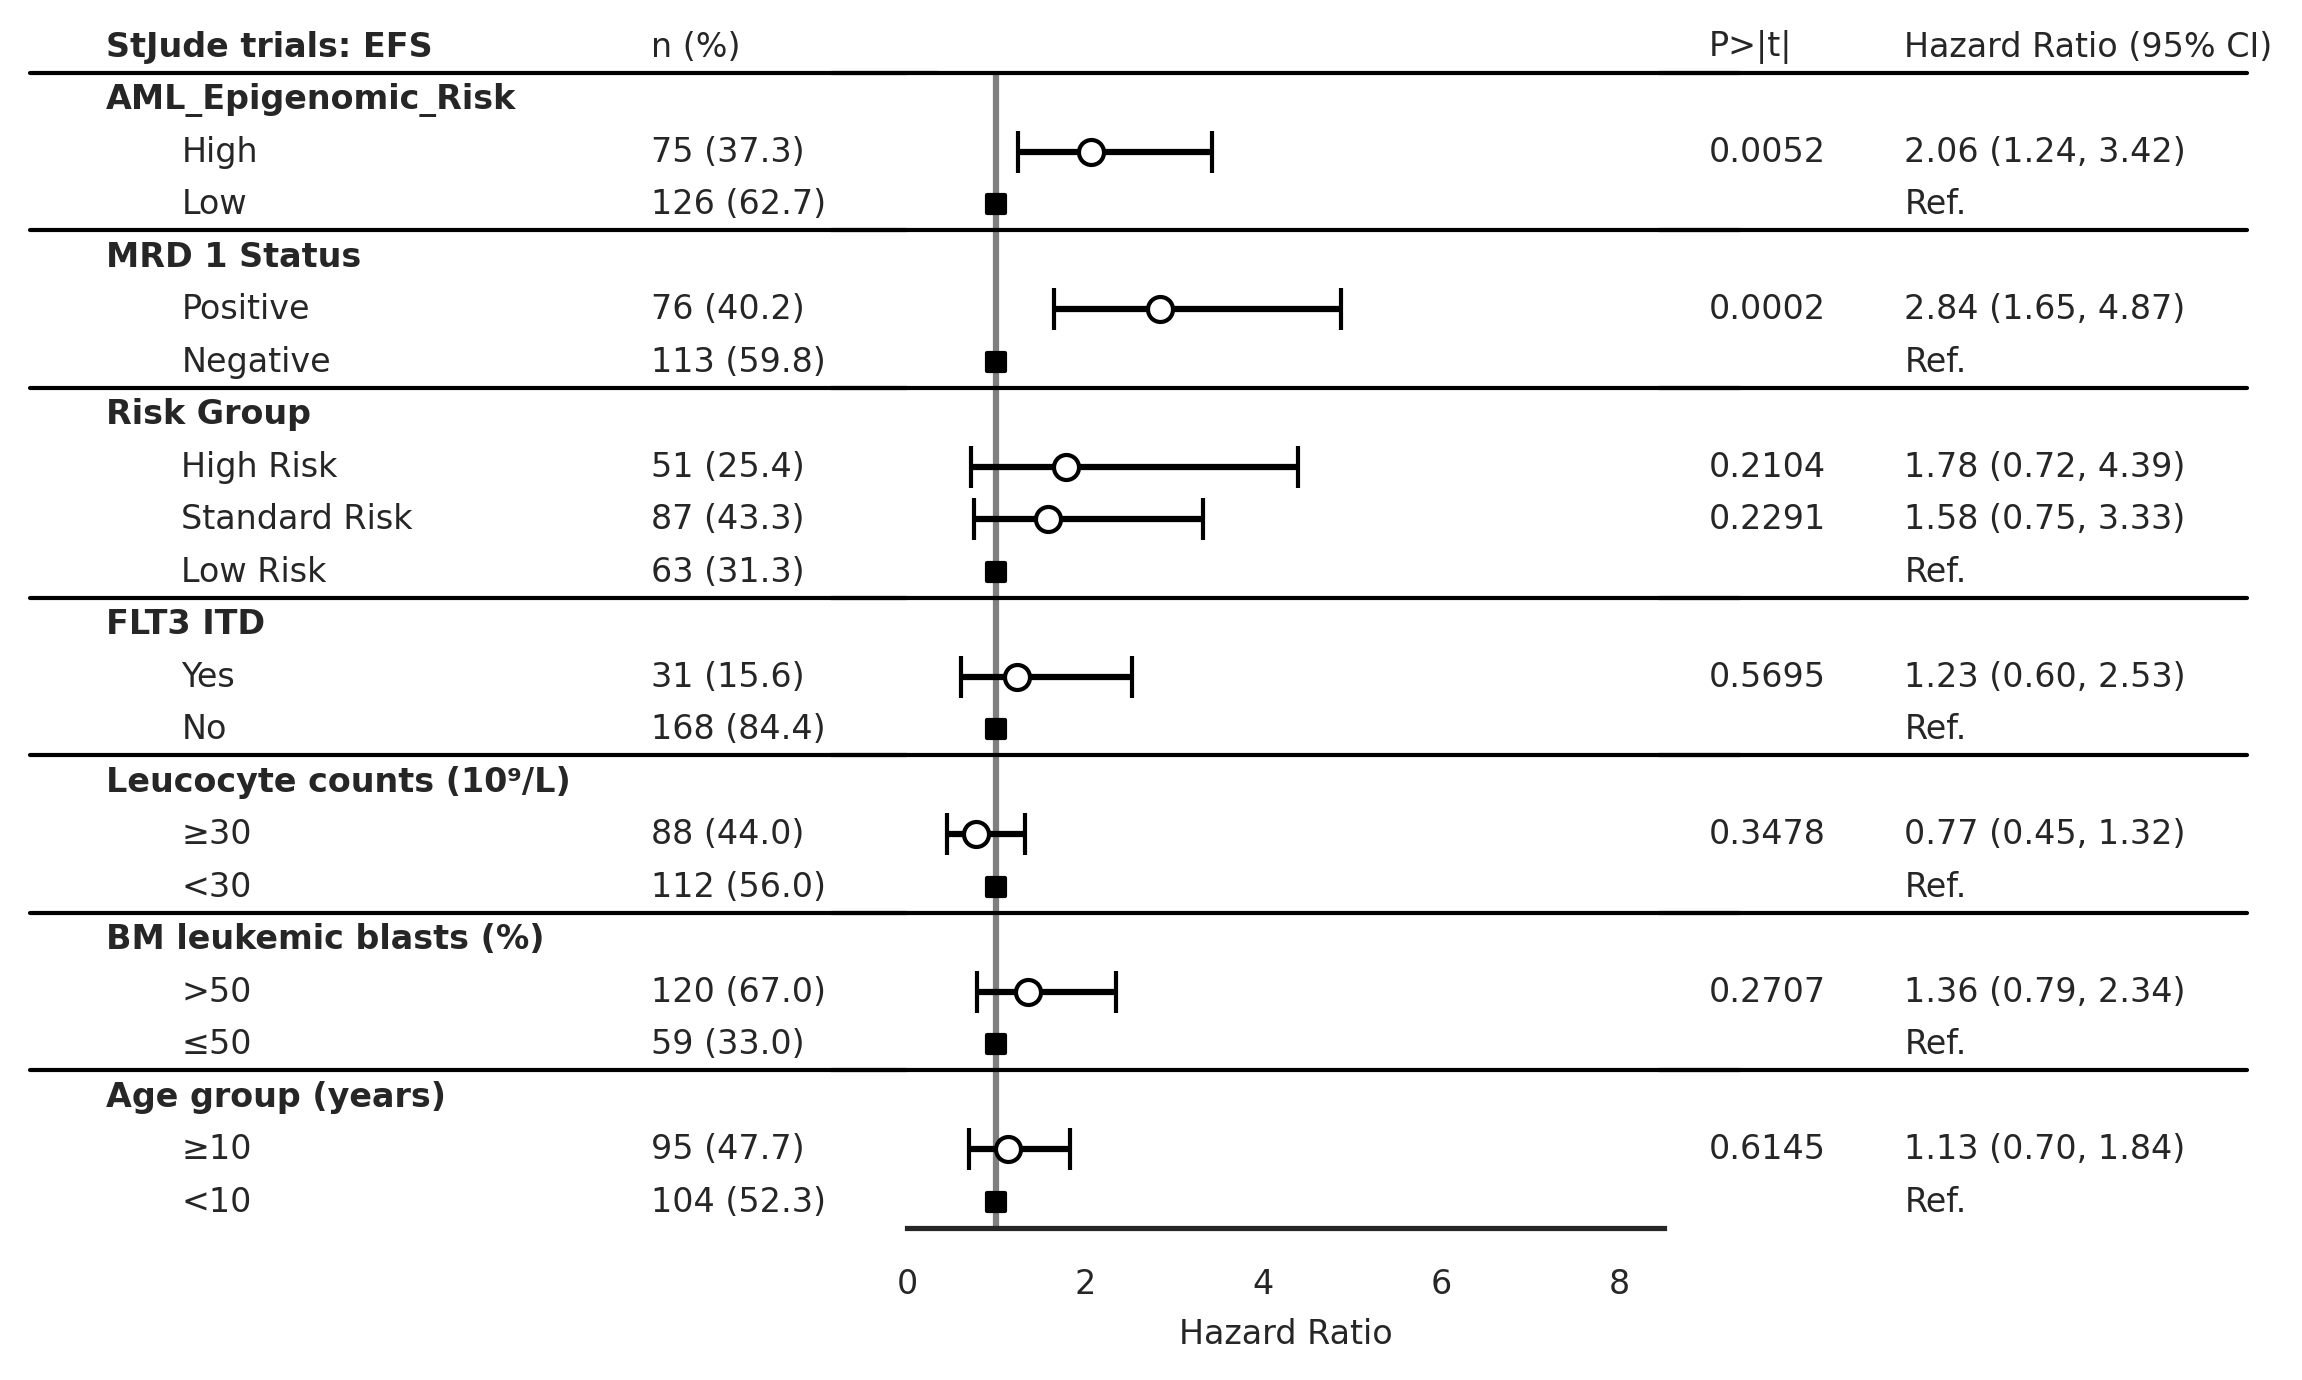

In [17]:

draw_forest_plot_withBMblast(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot_withBMblast(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)


#### With MRD 1 without BM blast (%)

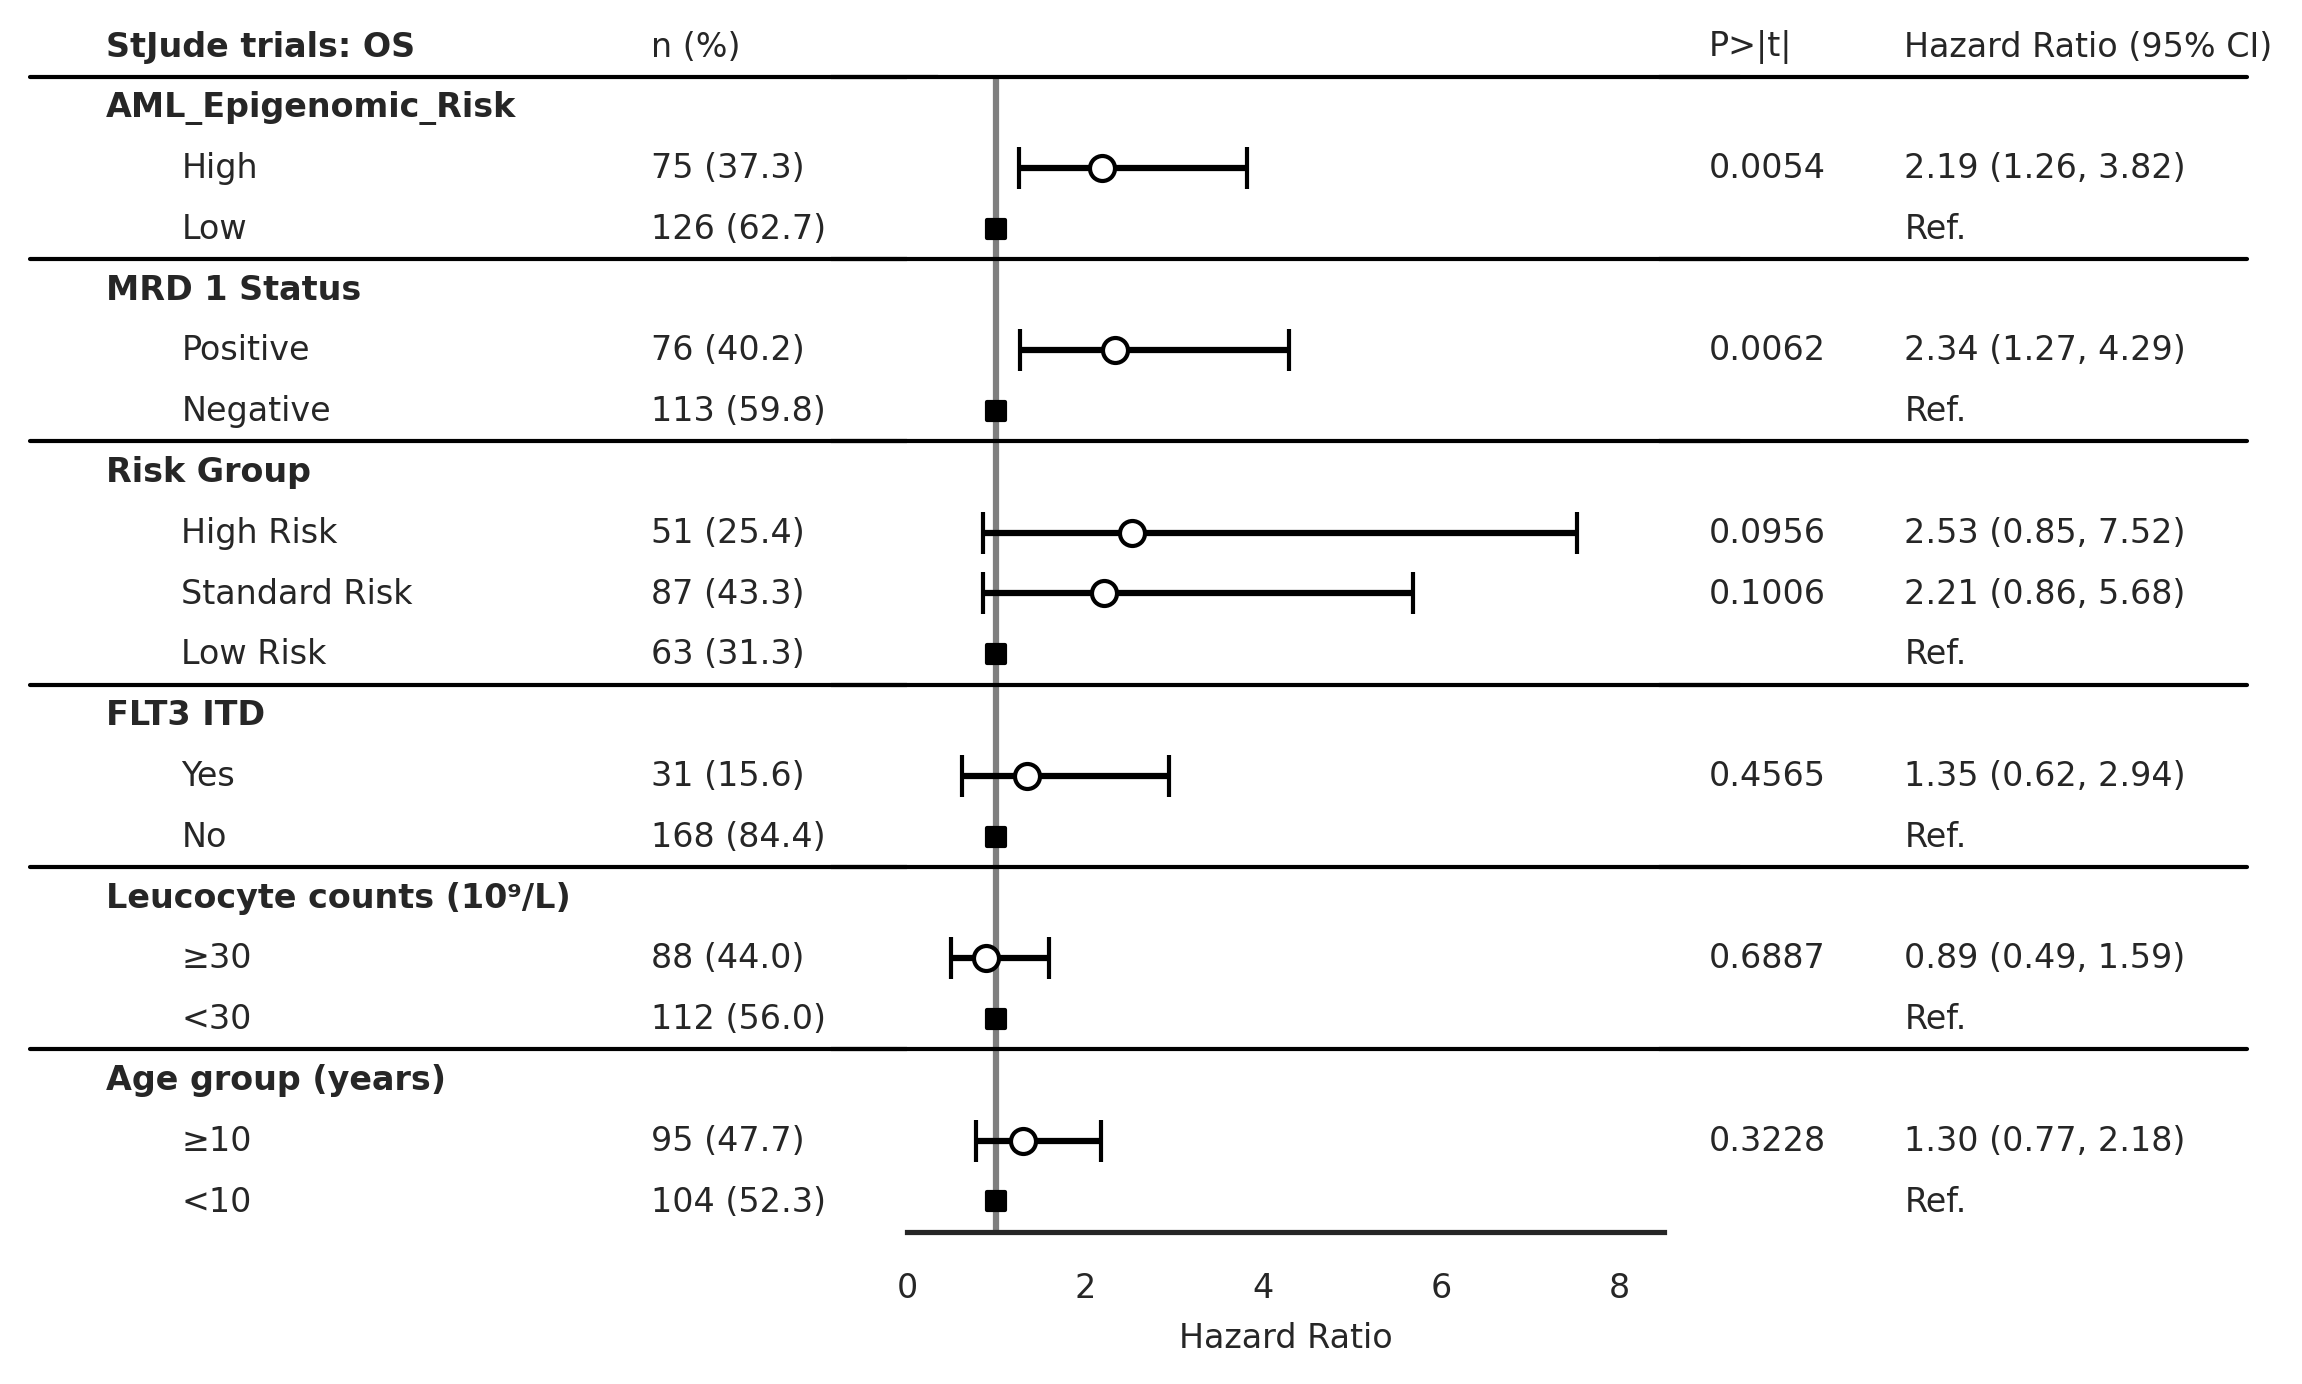

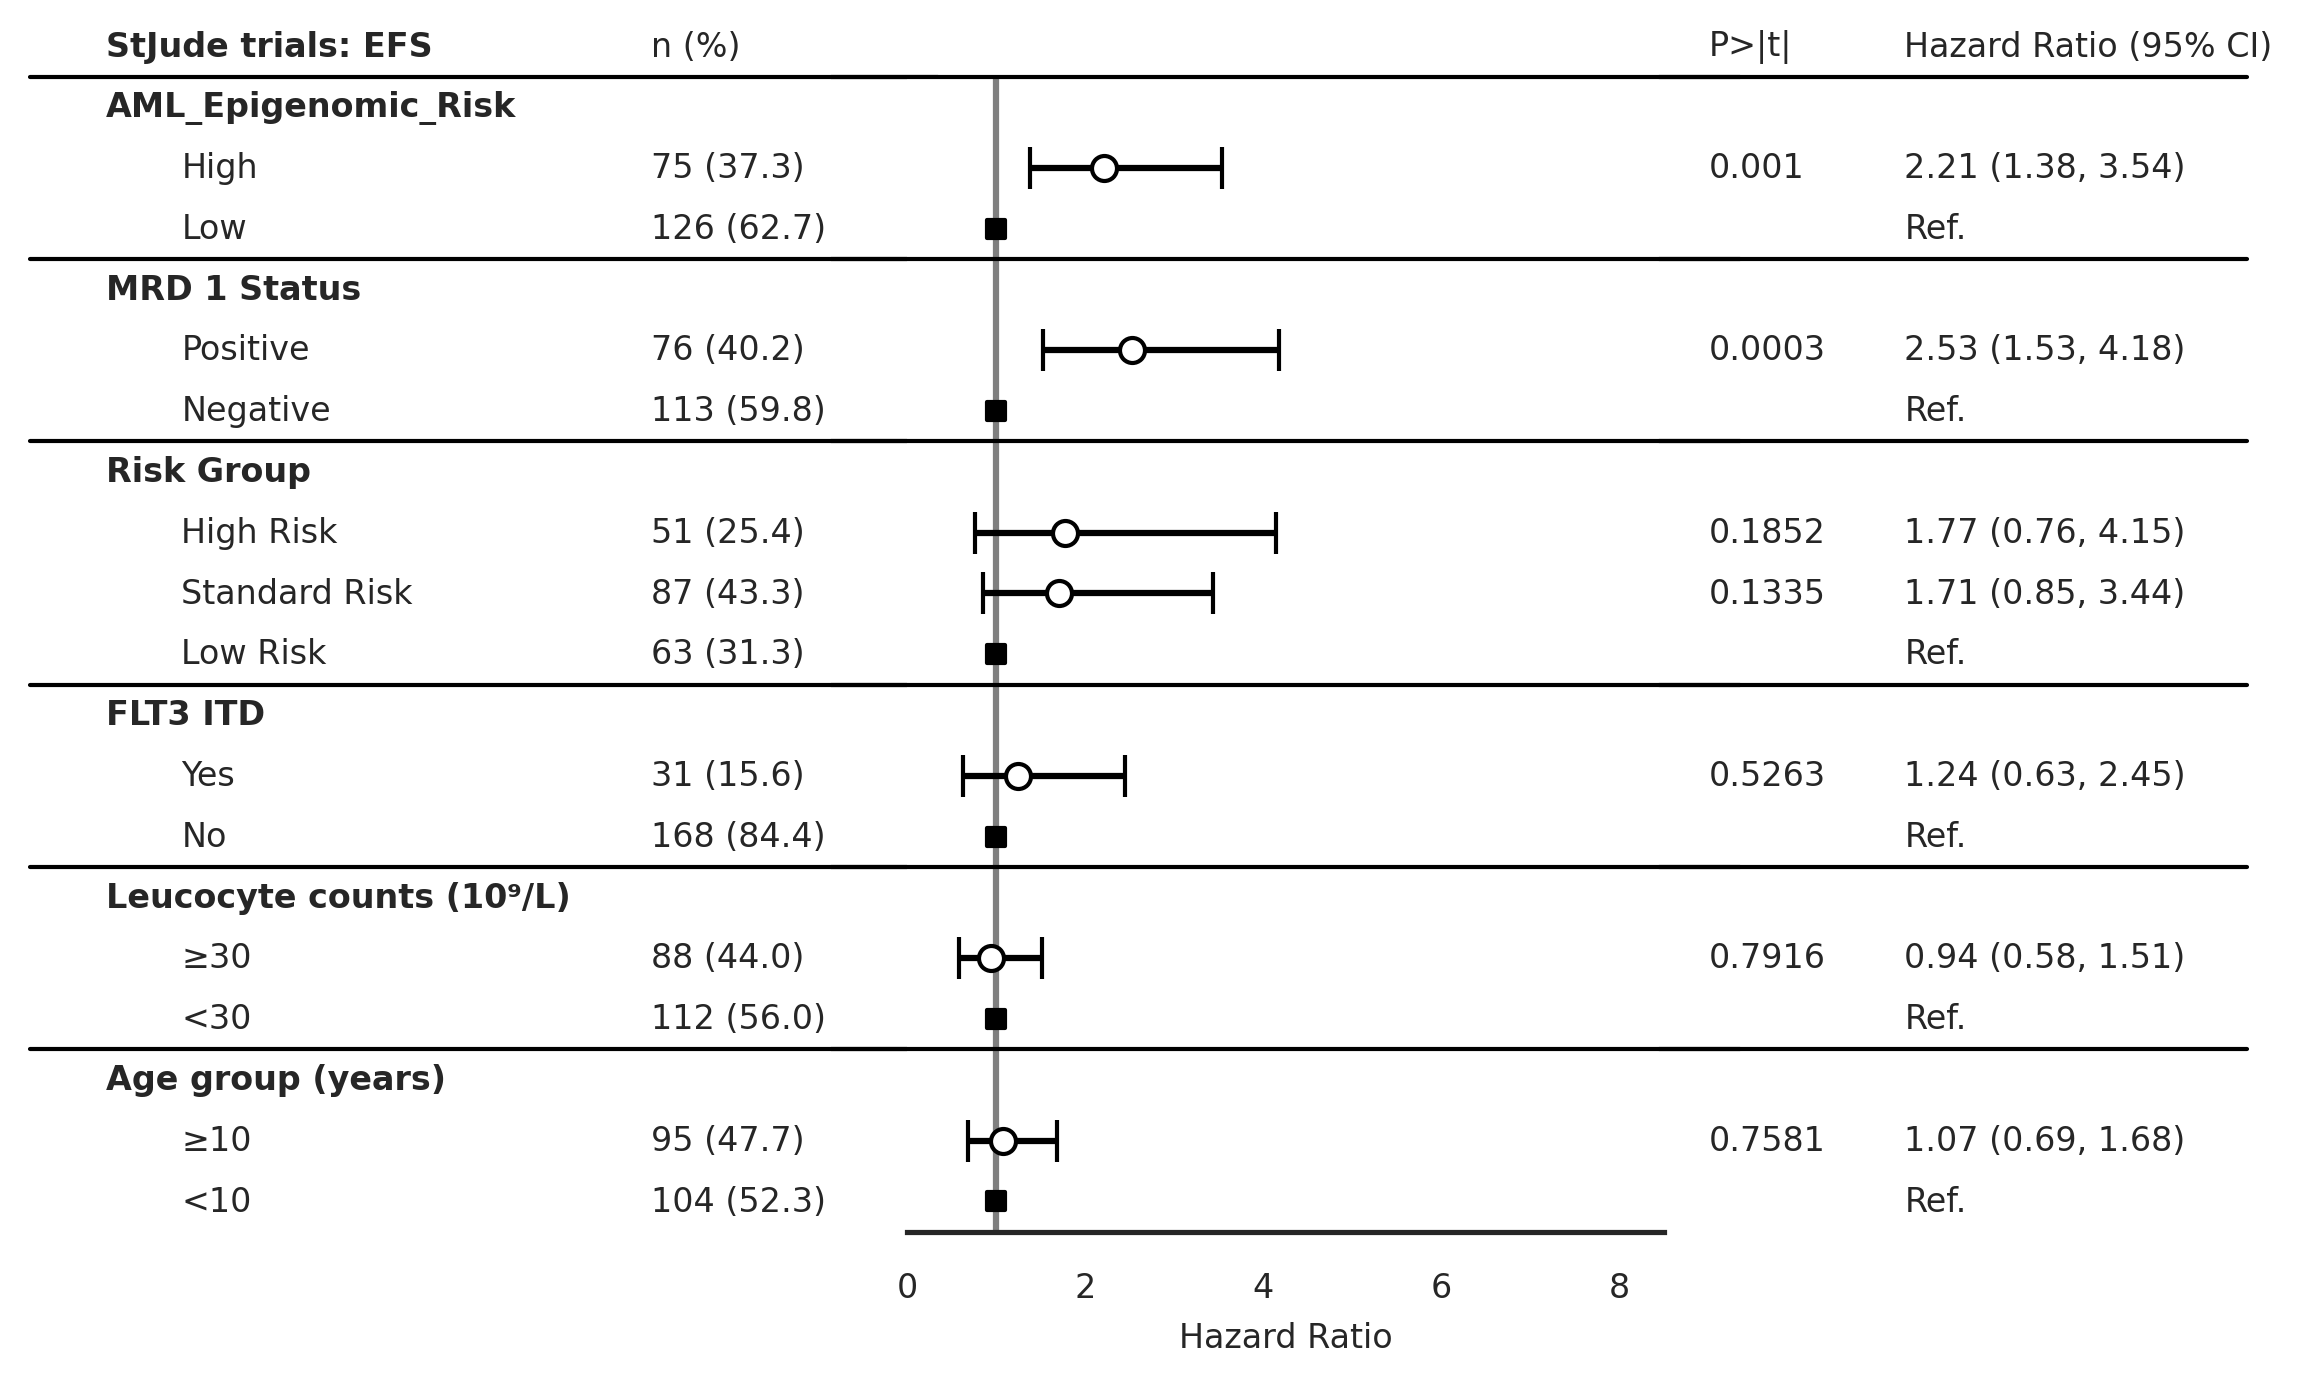

In [18]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

#### Without MRD 1

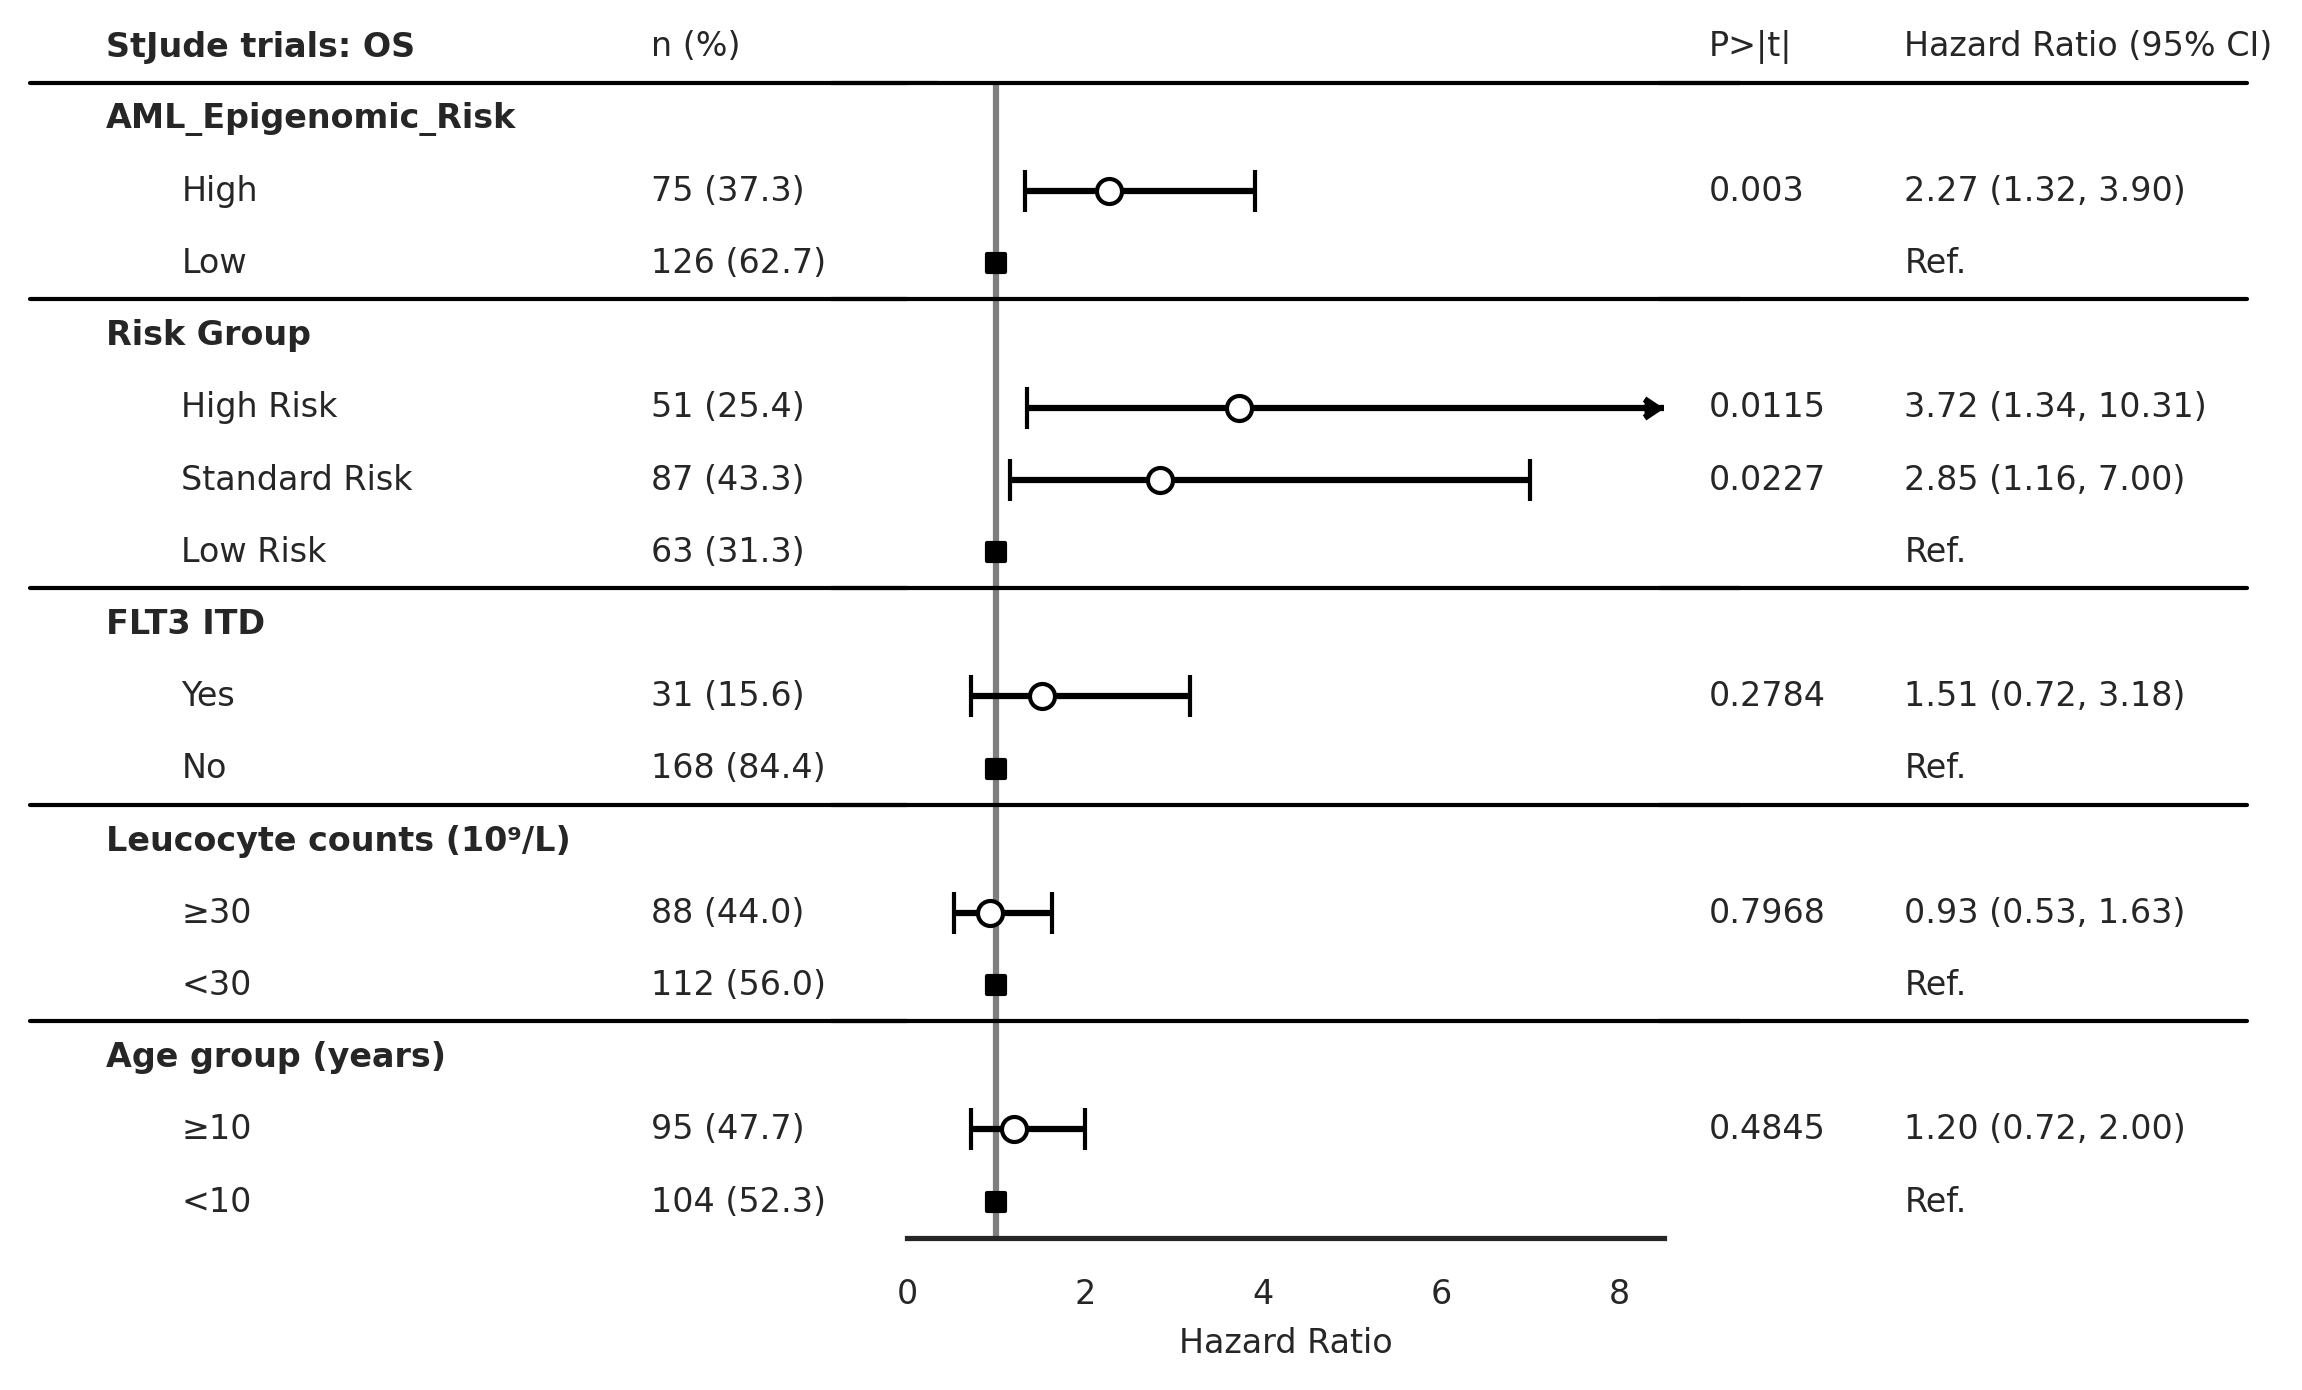

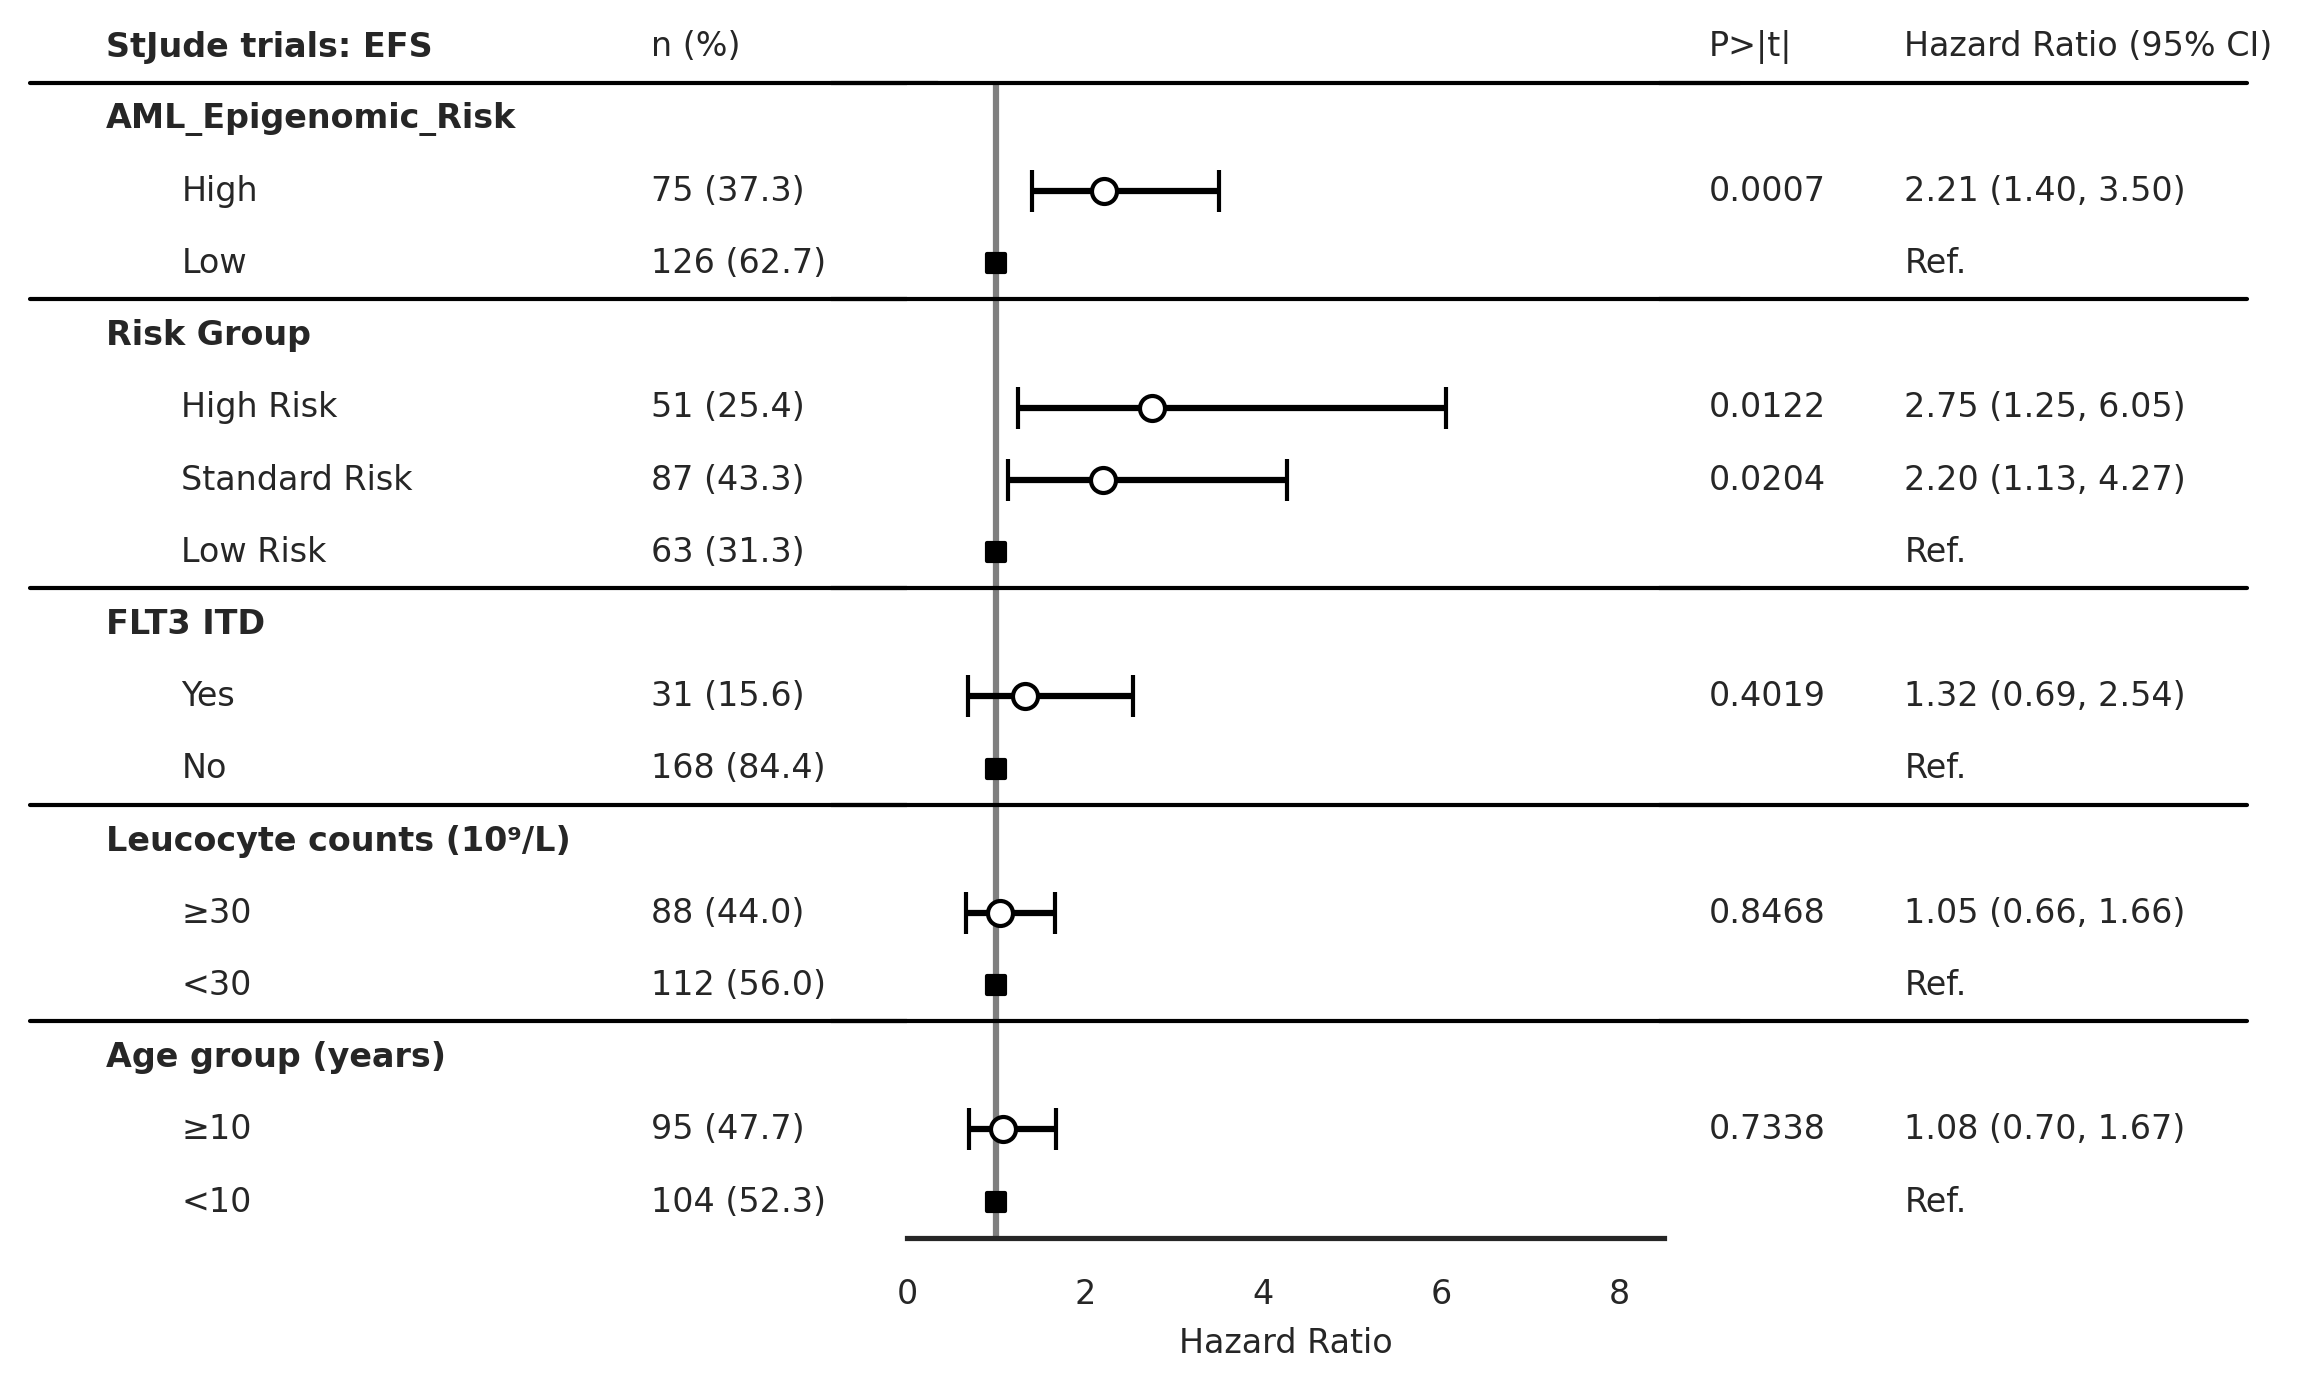

In [19]:
draw_forest_plot_noMRD(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot_noMRD(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    model_name='AML_Epigenomic_Risk',
                    save_plot=False)

### ROC AUC

In [25]:

# Train datasets
p1 = plot_roc_auc(df_cog[['os.evnt', 'P(High Risk)',]], 'os.evnt', title='COG Trials, Peds AML Dx Samples')
p2 = plot_roc_auc(df_train[['os.evnt', 'P(High Risk)',]], 'os.evnt', title='Discovery Cohort')
# p3 = plot_roc_auc(df_cog, 'os.evnt', title='COG AML Trials')

# # Test datasets
# p4 = plot_roc_auc(df_cog, 'os.evnt', title='COG AML Trials')
# p5 = plot_roc_auc(df_test, 'os.evnt', title='Validation Trials')
# p6 = plot_roc_auc(df_cog, 'os.evnt', title='COG AML Trials')


# p = gridplot([[p1, p2, p3], [p4,p5, p6]], toolbar_location='above')

ValueError: Input y_true contains NaN.

### Box Plots

In [3]:
draw_boxplot(df=df_test,x='Risk Group', y='P(High Risk)',
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='MRD 1 Status', y='P(High Risk)',
                order=['Positive','Negative'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='Primary Cytogenetic Code', y='P(High Risk)',
                order='auto',
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

NameError: name 'df_test' is not defined

### Stacked Bar Plots

In [ ]:
draw_stacked_barplot(df=validation_clinical_data,x='MRD 1 Status', y=score_name,
             order=['Positive','Negative'],
             trialname='StJude trials', hue=score_name + ' Categorical',
             save_plot=False, figsize=None)

draw_stacked_barplot(df=validation_clinical_data,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=9)

draw_stacked_barplot(df=validation_clinical_data,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=6)



### Patient Characteristics Table

#### Overall study population

In [ ]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD','Treatment Arm']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']})

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_cohort.csv')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','Validation Cohort'])

#### Including both discovery and validation cohorts

In [ ]:
# Load clinical data
discovery_clinical_data = pd.read_csv(input_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

discovery_clinical_data['Age (years)'] = discovery_clinical_data['Age (years)'].astype(float)

px = discovery_clinical_data.loc[ewas_top_cpgs.index]

dx = discovery_clinical_data
# [~discovery_clinical_data['ELN 2022 Diagnosis'].isin(['Mixed phenotype acute leukemia T/myeloid',
#                                        'Myeloid leukaemia associated with Down syndrome',
#                                        'AML with t(9;22)(q34.1;q11.2)/BCR::ABL1'])]
dx = dx[~dx['WHO 2022 Diagnosis'].isna()]

# Use only samples from df_index
dx = dx[dx.index.isin(pd.read_csv(output_path+'pacmap_output/pacmap_5d_output_acute_leukemia.csv', index_col=1).index)]

# join discovery clinical data with validation clinical data
all_cohorts = pd.concat([dx, px, validation_clinical_data],
                         axis=0, keys=['MethylScoreAML Dx Discovery','MethylScoreAML Px Discovery' ,'Validation'],
                         names=['cohort']).reset_index()


columns = ['Age group (years)','Sex', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD', 'Treatment Arm','Clinical Trial']

mytable_cog = TableOne(all_cohorts, columns,
                        overall=False, missing=False,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                                groupby='cohort')

mytable_cog.to_excel('../data/tableone_both_cohorts.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        # headers=[score_name,"",score_name,'Validation','p-value','Statistical Test']
)

#### By MethylScore category

In [ ]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_methylscoreaml_px.csv')
mytable_cog.to_excel('../data/tableone_validation_methylscoreaml_px.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

## Watermark

In [ ]:
%load_ext watermark

In [ ]:
# watermark with all libraries used in this notebook
%watermark -v -p pandas,seaborn,matplotlib,tableone,sklearn,lifelines,statannotations -a Francisco_Marchi@Lamba_Lab_UF -d -m